In [8]:
import pandas as pd
import numpy as np
import urllib.request # to request URLs and get the HTML from it
import requests
import string
import matplotlib.pyplot as plt
import schedule
import time

In [9]:
data = pd.read_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtestin')

In [10]:
#Show
data.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Check columns
data.columns

Index(['Reported Date', 'Confirmed Negative', 'Presumptive Negative',
       'Presumptive Positive', 'Confirmed Positive', 'Resolved', 'Deaths',
       'Total Cases',
       'Total patients approved for testing as of Reporting Date',
       'Total tests completed in the last day', 'Under Investigation',
       'Number of patients hospitalized with COVID-19',
       'Number of patients in ICU with COVID-19',
       'Number of patients in ICU on a ventilator with COVID-19',
       'Total Positive LTC Resident Cases', 'Total Positive LTC HCW Cases',
       'Total LTC Resident Deaths', 'Total LTC HCW Deaths'],
      dtype='object')

In [12]:
# Check data types
data.dtypes

Reported Date                                                object
Confirmed Negative                                          float64
Presumptive Negative                                        float64
Presumptive Positive                                        float64
Confirmed Positive                                          float64
Resolved                                                    float64
Deaths                                                      float64
Total Cases                                                 float64
Total patients approved for testing as of Reporting Date    float64
Total tests completed in the last day                       float64
Under Investigation                                           int64
Number of patients hospitalized with COVID-19               float64
Number of patients in ICU with COVID-19                     float64
Number of patients in ICU on a ventilator with COVID-19     float64
Total Positive LTC Resident Cases               

In [13]:
# convert the 'Date' column to datetime format 
data['Reported Date']= pd.to_datetime(data['Reported Date']) 

In [14]:
# Check numm values
data.isnull().sum()

Reported Date                                                 0
Confirmed Negative                                          179
Presumptive Negative                                        214
Presumptive Positive                                        201
Confirmed Positive                                            2
Resolved                                                     12
Deaths                                                       40
Total Cases                                                   2
Total patients approved for testing as of Reporting Date      6
Total tests completed in the last day                        69
Under Investigation                                           0
Number of patients hospitalized with COVID-19                56
Number of patients in ICU with COVID-19                      56
Number of patients in ICU on a ventilator with COVID-19      56
Total Positive LTC Resident Cases                           103
Total Positive LTC HCW Cases            

In [15]:
data = data.fillna(0)
data.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,2020-01-26,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-27,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-28,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-30,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-31,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
data = data.rename(columns={'Confirmed Positive': 'Positive Cases', 'Number of patients hospitalized with COVID-19':'Hospitalization', 'Number of patients in ICU with COVID-19':'Enter ICU', 'Number of patients in ICU on a ventilator with COVID-19':'ICU on ventilator'})

In [17]:
new_data = data[['Reported Date', 'Positive Cases', 'Total Cases', 'Hospitalization', 'Enter ICU', 'ICU on ventilator']]

In [18]:
new_data.tail()

,Reported Date,Positive Cases,Total Cases,Hospitalization,Enter ICU,ICU on ventilator
221,2020-09-14,2027.0,44817.0,47.0,17.0,8.0
222,2020-09-15,2157.0,45068.0,47.0,19.0,11.0
223,2020-09-16,2316.0,45383.0,44.0,20.0,12.0
224,2020-09-17,2427.0,45676.0,53.0,21.0,12.0
225,2020-09-18,2652.0,46077.0,58.0,20.0,10.0


In [19]:
new_data['Reported Date'] = pd.to_datetime(data['Reported Date']) - pd.to_timedelta(7, unit='d')

In [20]:
from pandas.tseries.offsets import *
new_data['date_week'] = new_data['Reported Date'] + Week(weekday=6)

In [21]:
#Find the averages per week
#This gives us a better outlook on the week compated to daily shock increases

data2 = new_data[['date_week', 'Positive Cases','Hospitalization','Enter ICU', 'ICU on ventilator']]
data2 = data2.groupby(['date_week']).mean()
data2.head()

,Positive Cases,Hospitalization,Enter ICU,ICU on ventilator
date_week,,,,
2020-01-26,1.0,0.0,0.0,0.0
2020-02-02,3.0,0.0,0.0,0.0
2020-02-09,2.4,0.0,0.0,0.0
2020-02-16,1.4,0.0,0.0,0.0
2020-02-23,1.6,0.0,0.0,0.0


In [22]:
#Turn the data to absolute values
data3 = abs(data2.diff(axis = 0, periods = 1))

In [23]:
#Round the data to whole numbers
data3 = round(data3, 0)
data3.head()

,Positive Cases,Hospitalization,Enter ICU,ICU on ventilator
date_week,,,,
2020-01-26,NaN,NaN,NaN,NaN
2020-02-02,2.0,0.0,0.0,0.0
2020-02-09,1.0,0.0,0.0,0.0
2020-02-16,1.0,0.0,0.0,0.0
2020-02-23,0.0,0.0,0.0,0.0


In [24]:
# Fill any NA with 0
data3 = data3.fillna(0)
data3.tail()

,Positive Cases,Hospitalization,Enter ICU,ICU on ventilator
date_week,,,,
2020-08-16,23.0,11.0,6.0,2.0
2020-08-23,109.0,9.0,0.0,0.0
2020-08-30,185.0,12.0,0.0,0.0
2020-09-06,308.0,7.0,0.0,0.0
2020-09-13,679.0,4.0,3.0,2.0


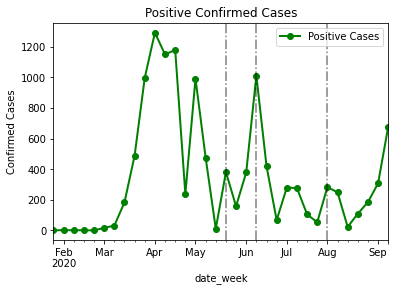

In [25]:
# plotting the average positive cases per week around the time when cities moved to stage 1, 2 and 3
fig = plt.figure()  # initiate the figure environment
data3['Positive Cases'].plot(color='green', linewidth=2, marker='o', legend=True)
plt.ylabel('Confirmed Cases')
# Make sure you change the title of the figure accordingly. 
plt.title('Positive Confirmed Cases')
# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 1')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

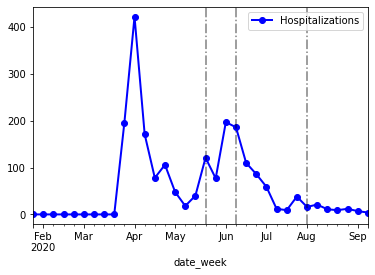

In [26]:
# plotting the average hospitalizations per week around the time when cities moved to stage 1, 2 and 3
fig = plt.figure()  # initiate the figure environment
data3['Hospitalization'].plot(label='Hospitalizations',kind="line", legend=True, linewidth=2, marker='o', color='blue')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 1')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

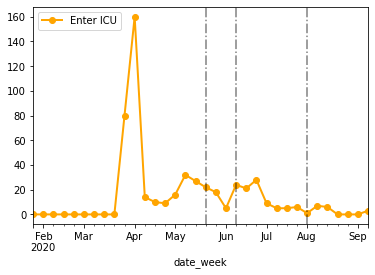

In [27]:
# plotting the average entering the ICU per week around the time when cities moved to stage 1, 2 and 3
data3['Enter ICU'].plot(label='Enter ICU',kind="line", legend=True, linewidth=2, marker='o', color='orange')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

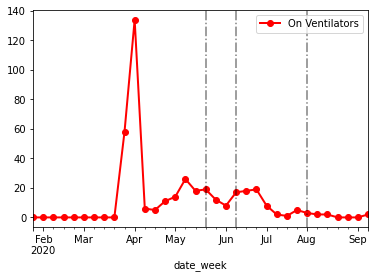

In [28]:
# plotting the average who use a venitaltor in the ICU per week around the time when cities moved to stage 1, 2 and 3
data3['ICU on ventilator'].plot(label='On Ventilators',kind="line", legend=True, linewidth=2, marker='o', color='red')

# This last line of code draws the vertical line in the plot when the last city moved to stage 1, 2 and 3
plt.axvline(x='2020-05-19', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-06-12', color='k', linestyle='-.', alpha=.5, label='Stage 2')
plt.axvline(x='2020-07-29', color='k', linestyle='-.', alpha=.5, label='Stage 3')

### Build a timeseries forecast

In [32]:
# Building the moving average model
# Moving average method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.
from statsmodels.tsa.arima_model import ARMA

In [33]:
#Fit the model
model = ARMA(data3['Positive Cases'], order=(0, 1))
model_fit = model.fit(disp=False)

/Users/abdirahmanali/.pyenv/versions/3.7.3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


In [34]:
# This makes a prediction of what the average positive cases would be at the begining of the following week
yhat = model_fit.predict(len(data3['Positive Cases']), len(data3['Positive Cases']))
print(round(yhat),0)

2020-09-20    531.0
Freq: W-SUN, dtype: float64 0
